In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# import and Reading whale returns
whale_returns_csv = Path("C:/Users/chefd/OneDrive/Desktop/whalecsv/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().mean()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# import and Reading algorithmic returns
algo_returns_csv = Path("C:/Users/chefd/OneDrive/Desktop/whalecsv/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().mean()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("C:/Users/chefd/OneDrive/Desktop/whalecsv/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp_tsx_history.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [9]:
# Check Data Types
sp_tsx_history.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "", regex=True)
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")



In [11]:
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype('float')
sp_tsx_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns={"Close": "S&P tsx 60"}, inplace=True)
sp_tsx_returns.head()


,S&P tsx 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:xlabel='Date'>

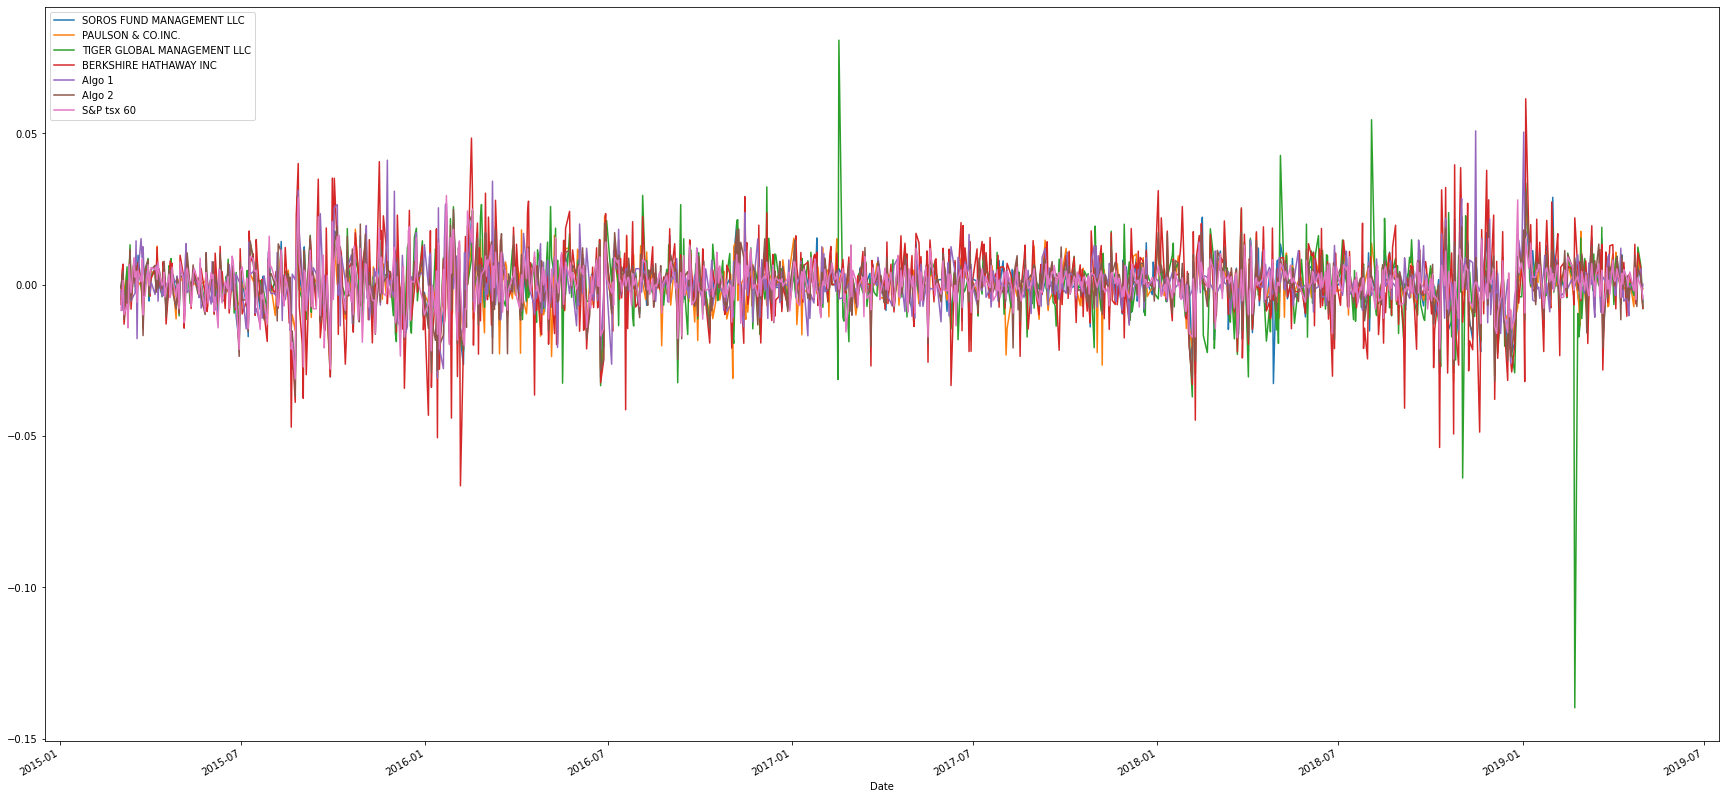

In [17]:
# Plot daily returns of all portfolios
combined_portfolios.plot(figsize=(30, 15))

<AxesSubplot:xlabel='Date'>

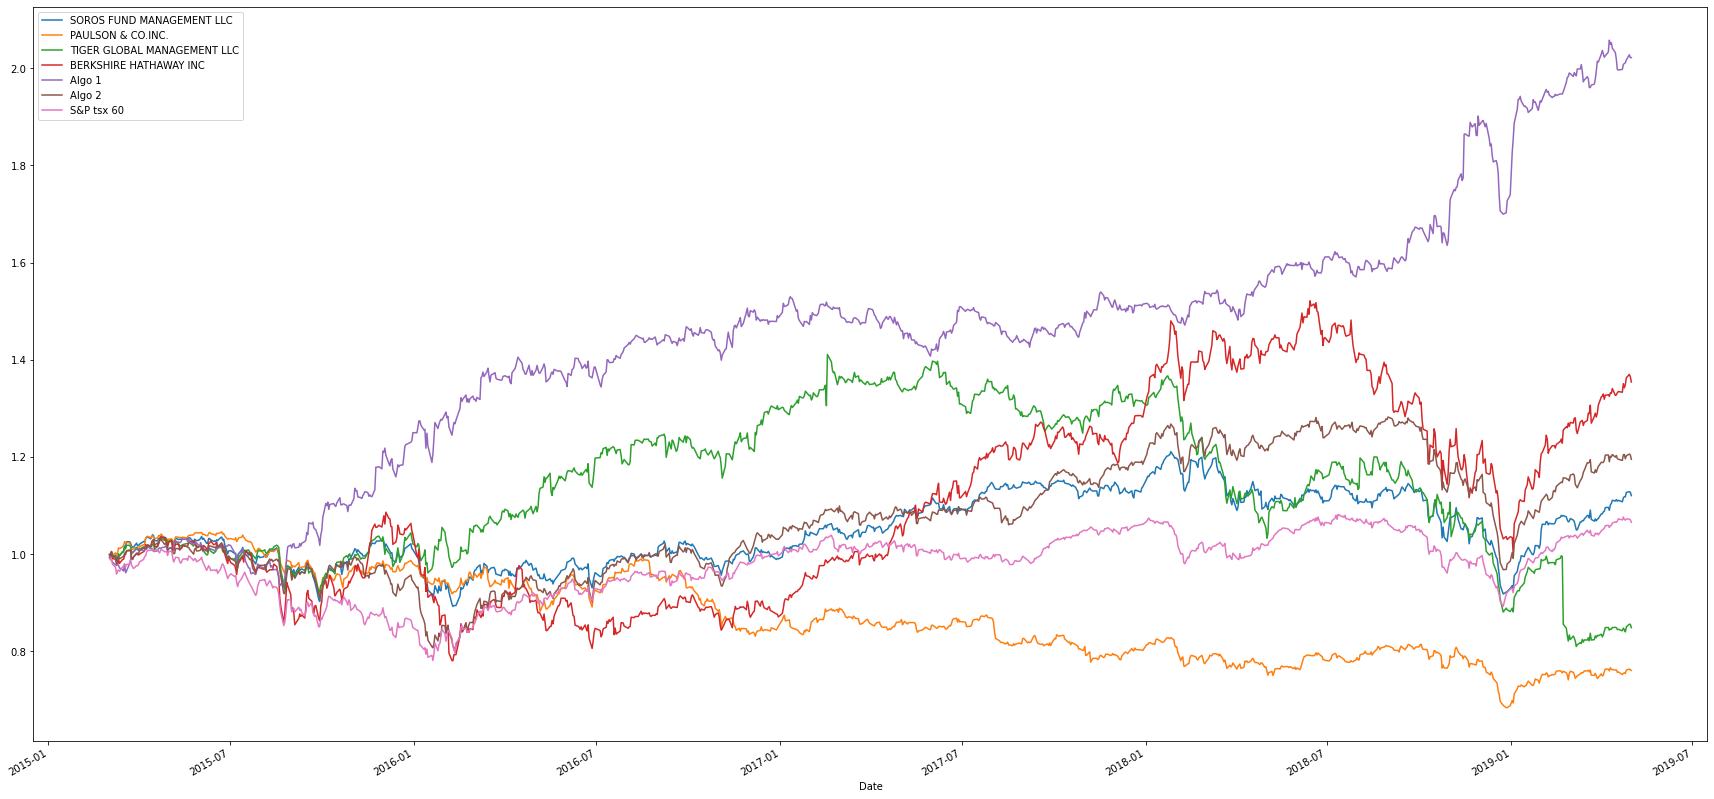

In [18]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
calcum_returns = (1 + combined_portfolios).cumprod()
calcum_returns.plot(figsize=(30, 15))

<AxesSubplot:>

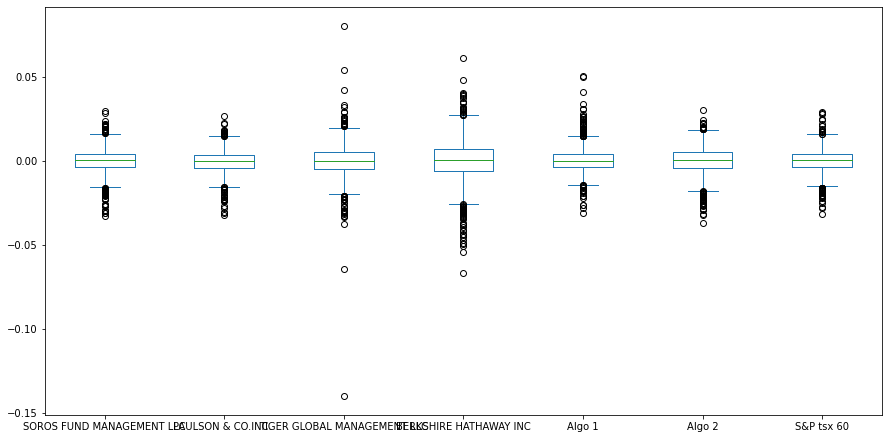

In [19]:
# Box plot to visually show risk
combined_portfolios.plot.box(figsize=(15, 7.5))

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P tsx 60                     0.007034
dtype: float64

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns.std()

# Determine which portfolios are riskier than the S&P TSX 60              (Could not figure it out)

S&P tsx 60    0.006637
dtype: float64

In [22]:
# Calculate the annualized standard deviation (252 trading days)
combined_portfolios.std() * np.sqrt(252)


SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P tsx 60                     0.111664
dtype: float64

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios.rolling(window=21).mean()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.001982,5.009154e-07,0.000489,0.002140,0.000809,0.000926,0.001231
2019-04-26,0.002560,7.854086e-04,0.001281,0.002925,0.000551,0.001389,0.001405
2019-04-29,0.002466,1.246472e-03,0.001296,0.002890,0.000326,0.001248,0.001300


<AxesSubplot:xlabel='Date'>

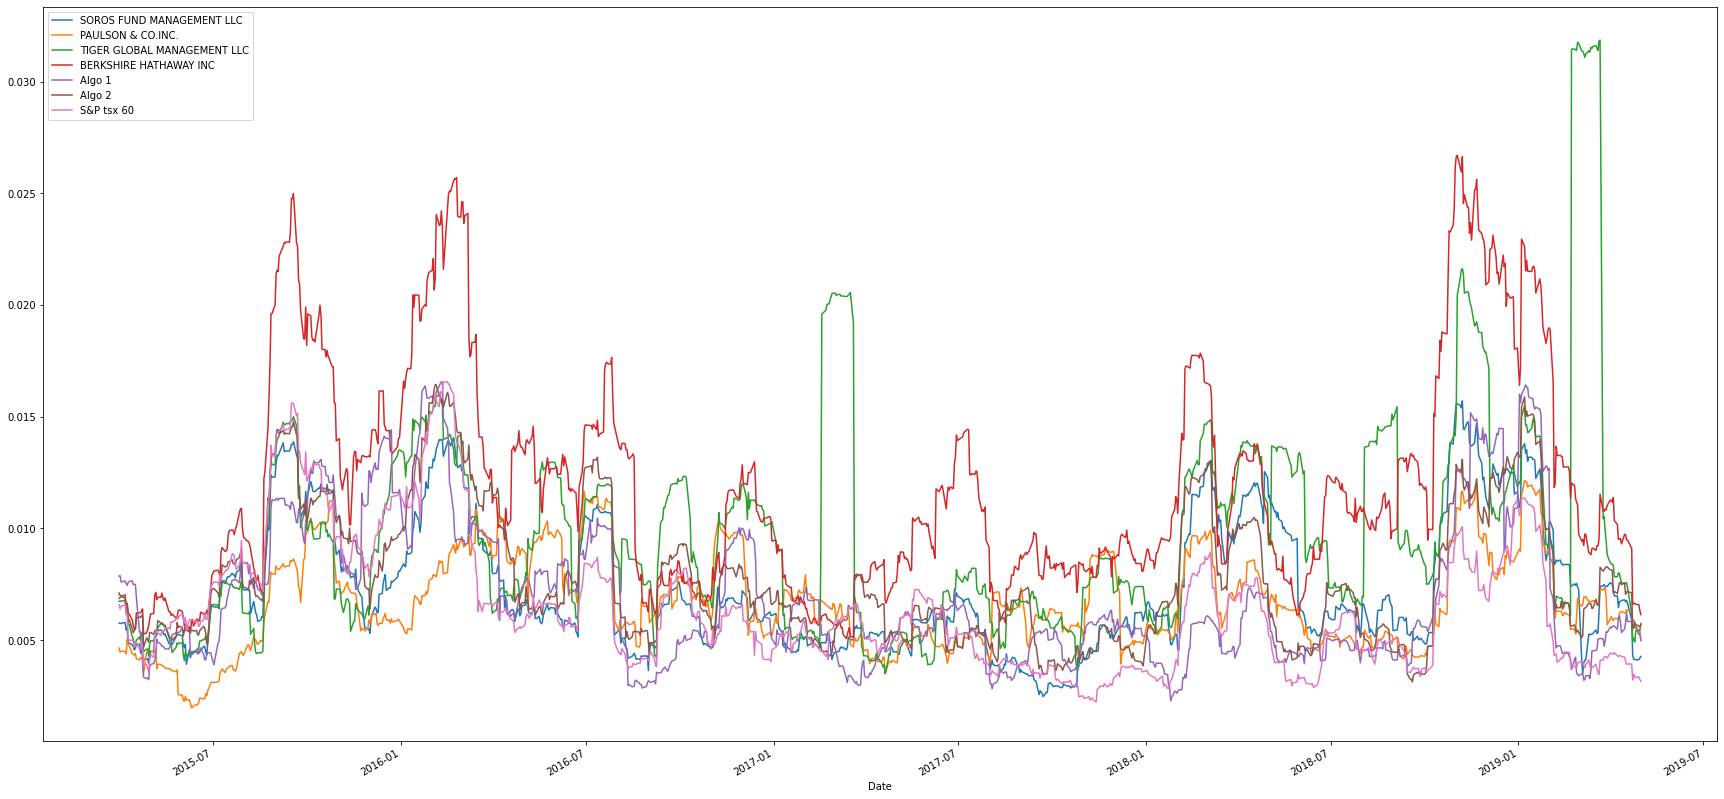

In [24]:
# Plot the rolling standard deviation
combined_portfolios.rolling(window=21).std().plot(figsize=(30, 15))

In [25]:
# Calculate the correlation
calculated_correlation = combined_portfolios.corr()

# Display de correlation matrix
calculated_correlation.style.background_gradient(cmap='coolwarm')


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P tsx 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [26]:
# Calculate covariance of a single portfolio
covariance = combined_portfolios["Algo 1"].rolling(window=30).cov(combined_portfolios["S&P tsx 60"])

In [27]:
# Calculate variance of S&P TSX
variance = combined_portfolios["S&P tsx 60"].rolling(window=30).var()


In [28]:
# Computing beta
algo_beta = covariance / variance


<AxesSubplot:xlabel='Date'>

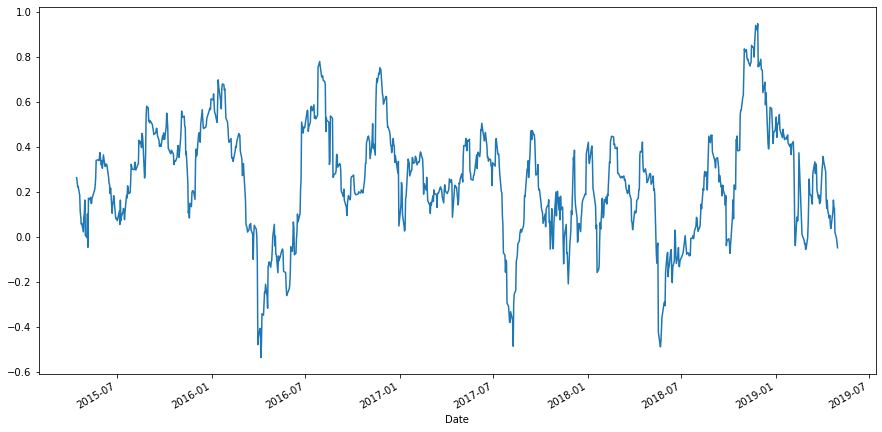

In [29]:
# Plot beta trend
algo_beta.plot(figsize=(15, 7.5))


In [30]:
# Use `ewm` to calculate the rolling window 21 day1/2 life          (Could not figure it out)

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))




<AxesSubplot:>

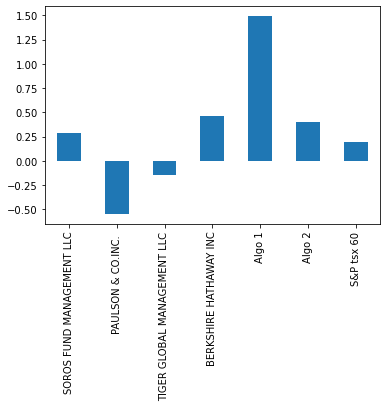

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

In [33]:
# MY PORTFOLIO

In [36]:
# Reading data from 1st stock
Ac_history_csv = Path("C:/Users/chefd/OneDrive/Desktop/csv/AC_closing_data.csv")
Ac_history = pd.read_csv(Ac_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
Ac_history = Ac_history.sort_index()
# Reading data from 2nd stock
CCL_history_csv = Path("C:/Users/chefd/OneDrive/Desktop/csv/CCL_closing_data.csv")
CCL_history = pd.read_csv(CCL_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
CCL_history = Ac_history.sort_index()
# Reading data from 3rd stock
GSL_history_csv = Path("C:/Users/chefd/OneDrive/Desktop/csv/GSL_closing_data.csv")
GSL_history = pd.read_csv(GSL_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
GSL_history = GSL_history.sort_index()



In [49]:
# Combine all stocks in a single DataFrame
# Reset Date index
my_portfolio = pd.concat([Ac_history, CCL_history, GSL_history], axis="columns", join="inner")
# Reorganize portfolio data by having a column per symbol
columns = ["AC", "CCL", "GSL"]
my_portfolio.columns = columns
my_portfolio.head()

,AC,CCL,GSL
Date,,,
2016-01-04,9.95,9.95,20.80
2016-01-05,9.96,9.96,18.96
2016-01-06,9.70,9.70,19.28
2016-01-07,9.24,9.24,20.56
2016-01-08,9.25,9.25,20.08


In [50]:
# Calculate daily returns
my_daily_returns = my_portfolio.pct_change()
my_daily_returns.head()

,AC,CCL,GSL
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.001005,0.001005,-0.088462
2016-01-06,-0.026104,-0.026104,0.016878
2016-01-07,-0.047423,-0.047423,0.066390
2016-01-08,0.001082,0.001082,-0.023346


In [51]:
# Drop NAs
my_daily_returns.dropna(inplace=True)
# Display sample data
my_daily_returns.head()

,AC,CCL,GSL
Date,,,
2016-01-05,0.001005,0.001005,-0.088462
2016-01-06,-0.026104,-0.026104,0.016878
2016-01-07,-0.047423,-0.047423,0.066390
2016-01-08,0.001082,0.001082,-0.023346
2016-01-11,-0.007568,-0.007568,-0.075697


In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]
# calculate portfolio_returns
my_portfolio_returns = my_daily_returns.dot(weights)
# Display sample data
my_portfolio_returns.head(10)



Date
2016-01-05   -0.028817
2016-01-06   -0.011777
2016-01-07   -0.009485
2016-01-08   -0.007061
2016-01-11   -0.030277
2016-01-12   -0.012330
2016-01-13   -0.019665
2016-01-14   -0.105007
2016-01-15   -0.050762
2016-01-19   -0.056832
dtype: float64

In [53]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios["MY PORTFOLIO"] = my_portfolio_returns
combined_portfolios.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60,MY PORTFOLIO
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542,-0.028817
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964,-0.011777
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890,-0.009485
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,-0.007061
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140,-0.030277


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.dropna(inplace=True)
combined_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60,MY PORTFOLIO
Date,,,,,,,,
2016-01-05,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542,-0.028817
2016-01-06,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964,-0.011777
2016-01-07,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890,-0.009485
2016-01-08,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222,-0.007061
2016-01-11,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140,-0.030277


In [57]:
# Calculate the annualized `std`
combined_portfolios.std()


SOROS FUND MANAGEMENT LLC      0.007776
PAULSON & CO.INC.              0.007174
TIGER GLOBAL MANAGEMENT LLC    0.011410
BERKSHIRE HATHAWAY INC         0.012762
Algo 1                         0.007223
Algo 2                         0.008209
S&P tsx 60                     0.006377
MY PORTFOLIO                   0.023491
dtype: float64

In [59]:
# Calculate rolling standard deviation
combined_portfolios.rolling(window=30).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60,MY PORTFOLIO
Date,,,,,,,,
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.001509,-0.000017,0.000645,0.001906,0.000309,0.001080,0.000876,-0.001141
2019-04-26,0.001790,0.000223,0.001277,0.002529,0.000769,0.000992,0.001080,-0.001648
2019-04-29,0.001723,0.000182,0.001303,0.002534,0.000877,0.000957,0.000945,-0.000848


<AxesSubplot:xlabel='Date'>

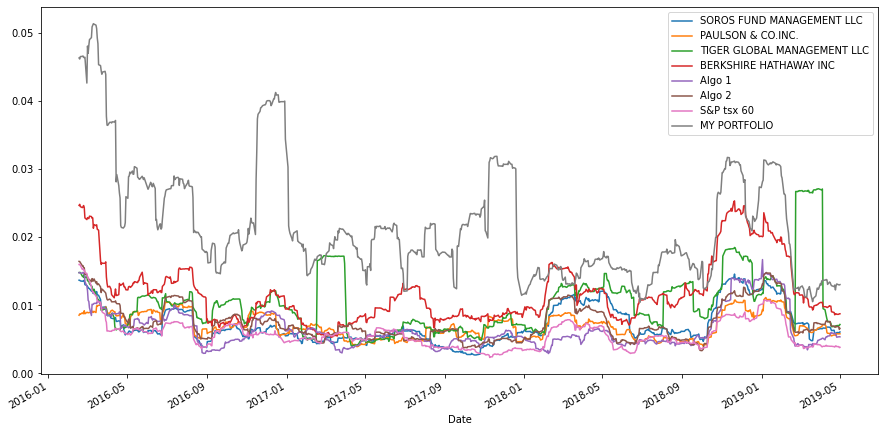

In [61]:
# Plot rolling standard deviation
combined_portfolios.rolling(window=30).std().plot(figsize=(15, 7.5))

In [65]:
# Calculate the correlation
calculated_correlation = combined_portfolios.corr()
# Plot the correlation

calculated_correlation.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P tsx 60,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.675128,0.511046,0.742974,0.276534,0.813281,0.643563,0.314085
PAULSON & CO.INC.,0.675128,1.000000,0.385806,0.516309,0.246290,0.668067,0.473856,0.165134
TIGER GLOBAL MANAGEMENT LLC,0.511046,0.385806,1.000000,0.374281,0.130830,0.450200,0.386116,0.107229
BERKSHIRE HATHAWAY INC,0.742974,0.516309,0.374281,1.000000,0.270973,0.676738,0.530681,0.289674
Algo 1,0.276534,0.246290,0.130830,0.270973,1.000000,0.266877,0.268880,0.149759
Algo 2,0.813281,0.668067,0.450200,0.676738,0.266877,1.000000,0.730420,0.382861
S&P tsx 60,0.643563,0.473856,0.386116,0.530681,0.268880,0.730420,1.000000,0.368982
MY PORTFOLIO,0.314085,0.165134,0.107229,0.289674,0.149759,0.382861,0.368982,1.000000


In [66]:
# Calculate covariance of my portfolio
covariance = combined_portfolios["MY PORTFOLIO"].rolling(window=30).cov(combined_portfolios["S&P tsx 60"])

In [67]:
# Calculate variance of S&P TSX
variance = combined_portfolios["S&P tsx 60"].rolling(window=30).var()

In [69]:
# Calculate Beta
my_portfolio_beta = covariance / variance

<AxesSubplot:xlabel='Date'>

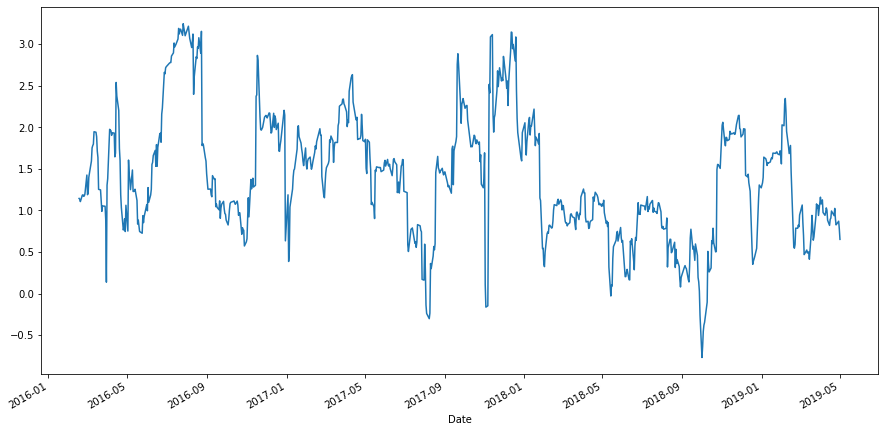

In [70]:
# Plot beta trend
my_portfolio_beta.plot(figsize=(15, 7.5))

In [71]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))


<AxesSubplot:>

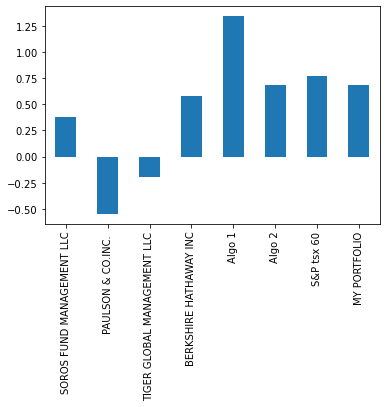

In [72]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")


In [76]:
# how does portfolio do
print("My portfolio seemed to do well in relation to other holdings in the combined portfolio, ranking in a third position. This was pre Covid so I am sure the outcome would be much different during Covid")

My portfolio seemed to do well in relation to other holdings in the combined portfolio, ranking in a third position. This was pre Covid so I am sure the outcome would be much different during Covid
